In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("G:\\Data Science\\AV_Hackathon\\Train.csv",parse_dates = ['Application_Receipt_Date','Applicant_BirthDate',
                                                                              'Manager_DOJ','Manager_DoB'],infer_datetime_format = True)
test = pd.read_csv("G:\\Data Science\\AV_Hackathon\\Test.csv",parse_dates = ['Application_Receipt_Date','Applicant_BirthDate',
                                                                              'Manager_DOJ','Manager_DoB'],infer_datetime_format = True)

In [3]:
train['source'] = 'train'
test['source'] = 'test'

In [4]:
data = pd.concat([train,test],ignore_index = True,sort = False)
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,source
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0,train
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0,train
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0,train
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0,train
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0,train


In [5]:
data_imp = data.copy(deep = True)

In [6]:
bool = data_imp['Applicant_BirthDate'] > '1995-01-01'

In [7]:
data_imp.loc[bool,'Applicant_BirthDate'] = np.nan

In [8]:
#find the year of birth of each applicant to find age and then impute the missing values with average age
bool_1 =  data_imp['Applicant_BirthDate'].notnull()
year = data_imp.loc[bool_1,'Applicant_BirthDate'].apply(lambda x : int(x.year))

In [9]:
np.mean(year)

1974.658191114489

In [10]:
year = 2009 - year
data_imp.loc[bool_1,'Applicant_Age'] = year

In [11]:
#find average of the applicants to fill the missingvalues
np.mean(data_imp.loc[bool_1,'Applicant_Age'])

34.34180888551095

In [12]:
data_imp.Applicant_Qualification.value_counts()

Class XII                                                                             7163
Graduate                                                                              6571
Others                                                                                 303
Class X                                                                                244
Masters of Business Administration                                                     145
Professional Qualification in Marketing                                                  6
Associate / Fellow of Institute of Chartered Accountans of India                         5
Associate/Fellow of Institute of Company Secretories of India                            1
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India       1
Associate/Fellow of Acturial Society of India                                            1
Associate/Fellow of Insurance Institute of India                                         1

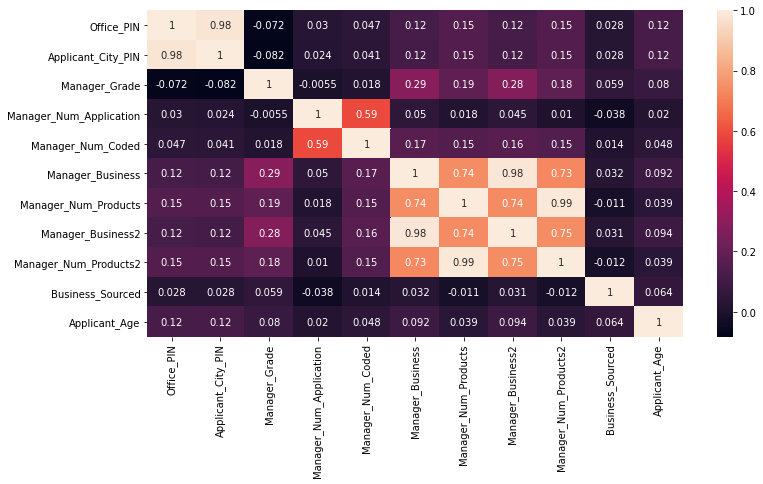

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(data_imp.corr(),annot = True)

In [14]:
#top_qual = ['Class XII','Graduate','Others','Class X','Masters of Business Administration']

In [15]:
#for label in top_qual:
#    data_imp[label] = np.where(data_imp['Applicant_Qualification'] == label,1,0)


[Text(0, 0, 'Graduate'),
 Text(0, 0, 'Class XII'),
 Text(0, 0, 'Class X'),
 Text(0, 0, 'Masters of Business Administration'),
 Text(0, 0, 'Associate/Fellow of Institute of Company Secretories of India'),
 Text(0, 0, 'Associate / Fellow of Institute of Chartered Accountans of India'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Associate/Fellow of Insurance Institute of India'),
 Text(0, 0, 'Associate/Fellow of Acturial Society of India'),
 Text(0, 0, 'Certified Associateship of Indian Institute of Bankers'),
 Text(0, 0, 'Professional Qualification in Marketing'),
 Text(0, 0, 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India')]

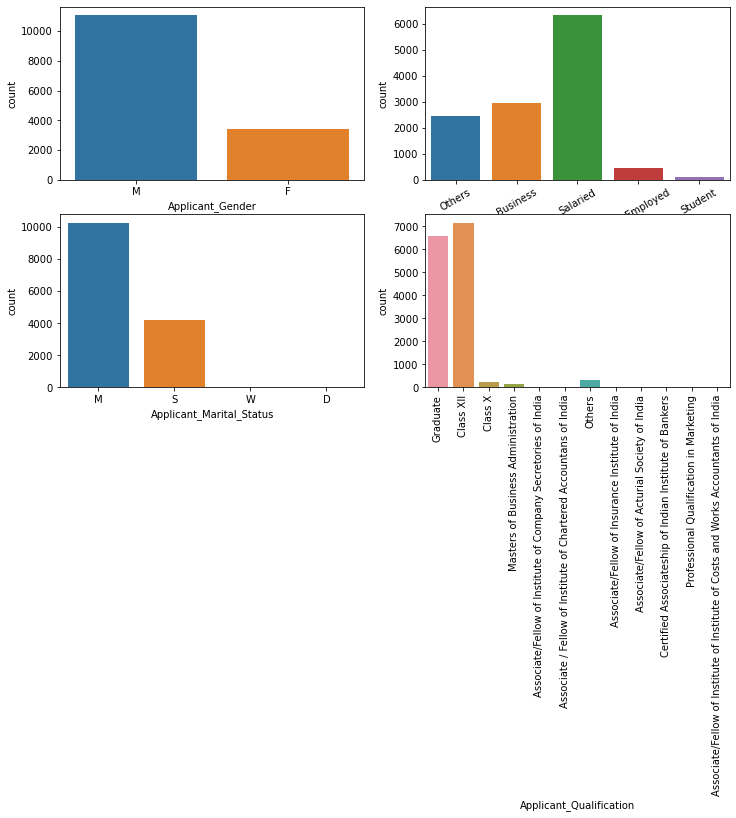

In [16]:
#find out the count plot of applicant gender 
plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
sns.countplot(data_imp.Applicant_Gender)
plt.subplot(2,2,2)
ax = sns.countplot(data_imp.Applicant_Occupation)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,2,3)
sns.countplot(data_imp.Applicant_Marital_Status)
plt.subplot(2,2,4)
ax = sns.countplot(data_imp.Applicant_Qualification)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


# age and qual trail

In [17]:
#experiment between age and qualification, imputing qual based on fixed age 34
#te = data_imp.Applicant_Age.notnull()
#te_1 = data_imp.loc[te,['Applicant_Qualification','Applicant_Age']]
#te_2 = te_1.pivot_table(index = 'Applicant_Age',values = 'Applicant_Qualification',aggfunc = lambda x: mode(x).mode[0])
#te_2.loc[34,:]

In [18]:
#try for other or unknown
data_imp.Applicant_Qualification.fillna('Class XII',inplace = True)

In [19]:
grp_by_qual = data_imp.pivot_table(index = 'Applicant_Qualification',values = 'Applicant_Age')

In [20]:
grp_by_qual = round(grp_by_qual)

In [21]:
grp_by_qual

,Applicant_Age
Applicant_Qualification,
Associate / Fellow of Institute of Chartered Accountans of India,40.0
Associate/Fellow of Acturial Society of India,24.0
Associate/Fellow of Institute of Company Secretories of India,65.0
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India,22.0
Associate/Fellow of Insurance Institute of India,35.0
Certified Associateship of Indian Institute of Bankers,28.0
Class X,34.0
Class XII,34.0
Graduate,35.0


In [22]:
bool_2 = data_imp.Applicant_Age.isnull()
data_imp.loc[bool_2,'Applicant_Age'] = data_imp.loc[bool_2,'Applicant_Qualification'].apply(lambda x : grp_by_qual.loc[x])

In [23]:
data_imp['Application_Month'] = data_imp.loc[:,'Application_Receipt_Date'].apply(lambda x : int(x.month))

In [24]:
data_imp.Applicant_Gender.value_counts()

M    11079
F     3404
Name: Applicant_Gender, dtype: int64

In [25]:
data_imp.Applicant_Gender.fillna('M',inplace = True)

In [26]:
data_imp.Applicant_Marital_Status.value_counts()

M    10266
S     4174
W       18
D       11
Name: Applicant_Marital_Status, dtype: int64

In [27]:
data_imp.pivot_table(index = 'Applicant_Marital_Status',values = 'Applicant_Age')#aggfunc = lambda x: mode(x).mode[0])

,Applicant_Age
Applicant_Marital_Status,
D,40.000000
M,37.118157
S,27.452803
W,43.000000


In [28]:
def find_marital_status(x):
    if x < 30:
        return 'S'
    elif x >= 30 :
        return 'M'

In [29]:
bool_3 = data_imp.Applicant_Marital_Status.isnull()
data_imp.loc[bool_3,'Applicant_Marital_Status'] = data_imp.loc[bool_3,'Applicant_Age'].apply(lambda x : find_marital_status(x))

In [30]:
data_imp.Applicant_Occupation.value_counts()

Salaried         6347
Business         2949
Others           2472
Self Employed     459
Student           120
Name: Applicant_Occupation, dtype: int64

In [31]:
from scipy.stats import mode
app_occupation = data_imp.pivot_table(index = 'Applicant_Qualification',values = 'Applicant_Occupation',aggfunc = lambda x : mode(x).mode[0])

In [32]:
app_occupation

,Applicant_Occupation
Applicant_Qualification,
Associate / Fellow of Institute of Chartered Accountans of India,Business
Associate/Fellow of Acturial Society of India,Salaried
Associate/Fellow of Institute of Company Secretories of India,Salaried
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India,Business
Associate/Fellow of Insurance Institute of India,Salaried
Certified Associateship of Indian Institute of Bankers,Others
Class X,Salaried
Class XII,Salaried
Graduate,Salaried


In [33]:
bool_4 = data_imp.Applicant_Occupation.isnull()
data_imp.loc[bool_4,'Applicant_Occupation'] = data_imp.loc[bool_4,'Applicant_Qualification'].apply(lambda x : app_occupation.loc[x])

In [34]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14572 entries, 0 to 14571
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           14572 non-null  object        
 1   Office_PIN                   14572 non-null  int64         
 2   Application_Receipt_Date     14572 non-null  datetime64[ns]
 3   Applicant_City_PIN           14441 non-null  float64       
 4   Applicant_Gender             14572 non-null  object        
 5   Applicant_BirthDate          14473 non-null  datetime64[ns]
 6   Applicant_Marital_Status     14572 non-null  object        
 7   Applicant_Occupation         14572 non-null  object        
 8   Applicant_Qualification      14572 non-null  object        
 9   Manager_DOJ                  13065 non-null  datetime64[ns]
 10  Manager_Joining_Designation  13065 non-null  object        
 11  Manager_Current_Designation  13065 non-nu

In [35]:
manager = data_imp.loc[data_imp.Manager_DOJ.isnull(),['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation',
                                           'Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB',
                                           'Manager_Num_Application','Manager_Num_Coded','Manager_Business',
                                            'Manager_Num_Products']]

In [36]:
manager

,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products
24,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
34,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
53,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
54,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
83,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14546,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
14547,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
14550,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
14556,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [37]:
#mlist = ['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation',
#                                           'Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB',
#                                           'Manager_Num_Application','Manager_Num_Coded','Manager_Business',
#                                            'Manager_Num_Products']

In [38]:
#calculating manager experience from DOJ and imputing missing values with average experience
bool_5 =  data_imp['Manager_DOJ'].notnull()
year_2 = data_imp.loc[bool_5,'Manager_DOJ'].apply(lambda x : int(x.year))
year_2 = 2009 - year_2
data_imp.loc[bool_5,'Manager_EXP'] = year_2

In [39]:
data_imp.Manager_EXP.describe()

count    13065.000000
mean         2.854956
std          1.888911
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          8.000000
Name: Manager_EXP, dtype: float64

In [40]:
#calculating manager age from DOB and imputing missing values with average age
bool_6 =  data_imp['Manager_DoB'].notnull()
year_3 = data_imp.loc[bool_6,'Manager_DoB'].apply(lambda x : int(x.year))
year_3 = 2009 - year_3
data_imp.loc[bool_6,'Manager_Age'] = year_3

In [41]:
data_imp.Manager_Age.describe()

count    13065.000000
mean        35.827095
std          6.222136
min         22.000000
25%         31.000000
50%         35.000000
75%         40.000000
max         60.000000
Name: Manager_Age, dtype: float64

[Text(0, 0, 'Confirmation'), Text(0, 0, 'Probation')]

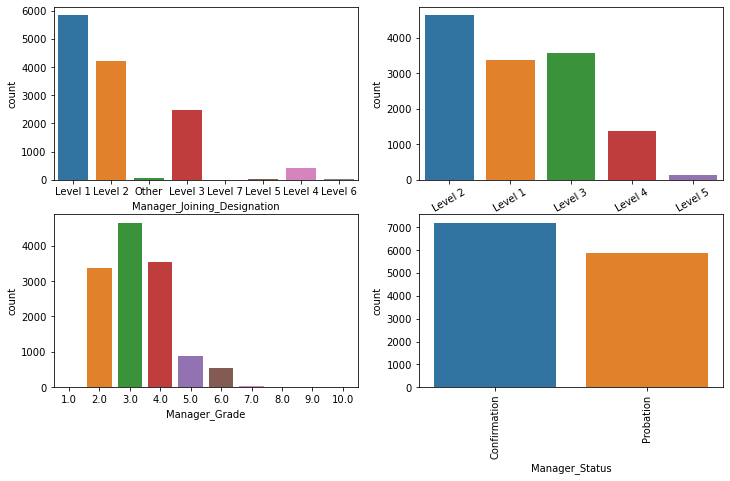

In [42]:
#find out the count plot of applicant gender 
plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
sns.countplot(data_imp.Manager_Joining_Designation)
plt.subplot(2,2,2)
ax = sns.countplot(data_imp.Manager_Current_Designation)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.subplot(2,2,3)
sns.countplot(data_imp.Manager_Grade)
plt.subplot(2,2,4)
ax = sns.countplot(data_imp.Manager_Status)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [43]:
#bool_7 = data_imp.Manager_Age.isnull()

In [44]:
#manager_age = round(data_imp.pivot_table(index = 'Applicant_Qualification',values = 'Manager_Age'))
#manager_age.loc['Certified Associateship of Indian Institute of Bankers'] = 35

In [45]:
#bool_8 = data_imp.Manager_Age.isnull()
#data_imp.loc[bool_8,"Manager_Age"] =  data_imp.loc[bool_8,'Applicant_Qualification'].apply(lambda x : manager_age.loc[x])

In [46]:
#round(data_imp.pivot_table(index = 'Applicant_Qualification',values = 'Manager_EXP'))

In [47]:
manager_curr_desig = data_imp.pivot_table(index = 'Applicant_Qualification',values = 'Manager_Current_Designation',aggfunc = lambda x: mode(x).mode[0])
manager_curr_desig.loc['Certified Associateship of Indian Institute of Bankers'] = 'Level 2'

In [48]:
manager_curr_desig

,Manager_Current_Designation
Applicant_Qualification,
Associate / Fellow of Institute of Chartered Accountans of India,Level 3
Associate/Fellow of Acturial Society of India,Level 2
Associate/Fellow of Institute of Company Secretories of India,Level 2
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India,Level 3
Associate/Fellow of Insurance Institute of India,Level 2
Certified Associateship of Indian Institute of Bankers,Level 2
Class X,Level 2
Class XII,Level 2
Graduate,Level 2


In [49]:
bool_7 = data_imp.Manager_Current_Designation.isnull()
data_imp.loc[bool_7,"Manager_Current_Designation"] =  data_imp.loc[bool_7,'Applicant_Qualification'].apply(lambda x : manager_curr_desig.loc[x])

In [50]:
manager_join_desig = data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Joining_Designation',aggfunc = lambda x: mode(x).mode[0])

In [51]:
manager_join_desig

,Manager_Joining_Designation
Manager_Current_Designation,
Level 1,Level 1
Level 2,Level 2
Level 3,Level 3
Level 4,Level 2
Level 5,Level 2


In [52]:
bool_8 = data_imp.Manager_Joining_Designation.isnull()
data_imp.loc[bool_8,"Manager_Joining_Designation"] =  data_imp.loc[bool_8,'Manager_Current_Designation'].apply(lambda x : manager_join_desig.loc[x])

In [53]:
manager_exp = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_EXP'))

In [54]:
manager_exp

,Manager_EXP
Manager_Current_Designation,
Level 1,2.0
Level 2,3.0
Level 3,3.0
Level 4,5.0
Level 5,7.0


In [55]:
bool_9 = data_imp.Manager_EXP.isnull()
data_imp.loc[bool_9,"Manager_EXP"] =  data_imp.loc[bool_9,'Manager_Current_Designation'].apply(lambda x : manager_exp.loc[x])

In [56]:
manager_age = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Age'))

In [57]:
bool_10 = data_imp.Manager_Age.isnull()
data_imp.loc[bool_10,"Manager_Age"] = data_imp.loc[bool_10,'Manager_Current_Designation'].apply(lambda x : manager_age.loc[x])

In [58]:
data_imp.Manager_Gender.fillna('M',inplace = True)

In [59]:
data_imp.pivot_table(index = 'Manager_Status',values = 'Manager_EXP')#,aggfunc = lambda x: mode(x).mode[0])

,Manager_EXP
Manager_Status,
Confirmation,3.995143
Probation,1.452637


In [60]:
def manager_status(x):
    if x <= 1:
        return "Probation"
    else:
        return "Confirmation"
    

In [61]:
bool_11 = data_imp.Manager_Status.isnull()
data_imp.loc[bool_11,"Manager_Status"] = data_imp.loc[bool_11,'Manager_EXP'].apply(lambda x : manager_status(x))

In [62]:
data_imp.Manager_Grade.value_counts()

3.0     4652
4.0     3545
2.0     3376
5.0      886
6.0      538
7.0       31
8.0       17
1.0        8
9.0        7
10.0       5
Name: Manager_Grade, dtype: int64

In [63]:
manager_grade = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Grade'))

In [64]:
manager_grade

,Manager_Grade
Manager_Current_Designation,
Level 1,2.0
Level 2,3.0
Level 3,4.0
Level 4,5.0
Level 5,6.0


In [65]:
bool_12 = data_imp.Manager_Grade.isnull()
data_imp.loc[bool_12,"Manager_Grade"] = data_imp.loc[bool_12,'Manager_Current_Designation'].apply(lambda x : manager_grade.loc[x])

In [66]:
manager_num_app = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Num_Application'))

In [67]:
bool_13 = data_imp.Manager_Num_Application.isnull()
data_imp.loc[bool_13,"Manager_Num_Application"] = data_imp.loc[bool_13,'Manager_Current_Designation'].apply(lambda x : manager_num_app.loc[x])

In [68]:
manage_num_coded = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Num_Coded'))

In [69]:
bool_14 = data_imp.Manager_Num_Coded.isnull()
data_imp.loc[bool_14,"Manager_Num_Coded"] = data_imp.loc[bool_14,'Manager_Current_Designation'].apply(lambda x : manage_num_coded.loc[x])

In [70]:
manager_business = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Business'))

In [71]:
manager_business

,Manager_Business
Manager_Current_Designation,
Level 1,99127.0
Level 2,140065.0
Level 3,155443.0
Level 4,348754.0
Level 5,705837.0


In [72]:
bool_15 = data_imp.Manager_Business.isnull()
data_imp.loc[bool_15,"Manager_Business"] = data_imp.loc[bool_15,'Manager_Current_Designation'].apply(lambda x : manager_business.loc[x])

In [73]:
manager_num_products = round(data_imp.pivot_table(index = 'Manager_Current_Designation',values = 'Manager_Num_Products'))

In [74]:
#bool_16 = data_imp.Manager_Num_Products.isnull()
#data_imp.loc[bool_16,"Manager_Num_Products"] = data_imp.loc[bool_16,'Manager_Current_Designation'].apply(lambda x : manager_num_products.loc[x])

In [75]:
#data_imp.Manager_Business.fillna(0,inplace = True)
#data_imp.Manager_Num_Products.fillna(0,inplace = True)

In [76]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14572 entries, 0 to 14571
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           14572 non-null  object        
 1   Office_PIN                   14572 non-null  int64         
 2   Application_Receipt_Date     14572 non-null  datetime64[ns]
 3   Applicant_City_PIN           14441 non-null  float64       
 4   Applicant_Gender             14572 non-null  object        
 5   Applicant_BirthDate          14473 non-null  datetime64[ns]
 6   Applicant_Marital_Status     14572 non-null  object        
 7   Applicant_Occupation         14572 non-null  object        
 8   Applicant_Qualification      14572 non-null  object        
 9   Manager_DOJ                  13065 non-null  datetime64[ns]
 10  Manager_Joining_Designation  14572 non-null  object        
 11  Manager_Current_Designation  14572 non-nu

In [77]:
data_imp['Manager_Joining_Designation'] = data_imp['Manager_Joining_Designation'].map({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Other':5,'Level 5':6,'Level 6':7,'Level 7':8})
data_imp['Manager_Current_Designation'] = data_imp['Manager_Current_Designation'].map({'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5})

In [78]:
#columns which are to be converted to dummies
dummies = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',
          'Manager_Status','Manager_Gender']

In [79]:
final_data = pd.get_dummies(data_imp,columns = dummies,drop_first = True)

In [80]:
#removing unwanted columns
cols_to_remove = ['ID','Office_PIN','Application_Receipt_Date','Applicant_City_PIN','Applicant_BirthDate',
'Manager_DOJ','Manager_DoB','Manager_Business2','Manager_Num_Products2','Manager_Num_Products',
                 'Applicant_Qualification_Associate/Fellow of Acturial Society of India',
                  'Applicant_Qualification_Associate/Fellow of Institute of Company Secretories of India',
                  'Applicant_Qualification_Associate/Fellow of Institute of Institute of Costs and Works Accountants of India',
                  'Applicant_Qualification_Associate/Fellow of Insurance Institute of India',
                  'Applicant_Qualification_Certified Associateship of Indian Institute of Bankers'
                  
                 ]
final_data.drop(columns = cols_to_remove,axis = 1,inplace = True)

In [81]:
final_data.columns

Index(['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Business_Sourced', 'source', 'Applicant_Age',
       'Application_Month', 'Manager_EXP', 'Manager_Age', 'Applicant_Gender_M',
       'Applicant_Marital_Status_M', 'Applicant_Marital_Status_S',
       'Applicant_Marital_Status_W', 'Applicant_Occupation_Others',
       'Applicant_Occupation_Salaried', 'Applicant_Occupation_Self Employed',
       'Applicant_Occupation_Student', 'Applicant_Qualification_Class X',
       'Applicant_Qualification_Class XII', 'Applicant_Qualification_Graduate',
       'Applicant_Qualification_Masters of Business Administration',
       'Applicant_Qualification_Others',
       'Applicant_Qualification_Professional Qualification in Marketing',
       'Manager_Status_Probation', 'Manager_Gender_M'],
      dtype='object')

In [82]:
data_train = final_data[final_data['source'] == 'train']
data_test = final_data[final_data['source'] == 'test']
data_train.drop('source',axis = 1,inplace = True)
data_test.drop(['source','Business_Sourced'],axis = 1,inplace = True)
print("Dimension of Train data: {}".format(data_train.shape))
print("Dimension of Test data: {}".format(data_test.shape))

Dimension of Train data: (9527, 27)
Dimension of Test data: (5045, 26)


C:\Users\user\Anaconda4\envs\DeeplEnv\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
X = data_train[data_train.columns.difference(['Business_Sourced'])]
y = data_train['Business_Sourced']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Dimension of Train data: {}".format(X_train.shape))
print("Dimension of Test data: {}".format(X_test.shape))

Dimension of Train data: (7621, 26)
Dimension of Test data: (1906, 26)


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data_test = scaler.transform(data_test)

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
sm = SMOTE(random_state=27)

In [89]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [90]:
X_train

array([[-0.99496271,  0.55688912, -1.37877764, ...,  0.50355138,
        -0.67557355,  1.29747859],
       [-1.18933629, -1.79568959, -1.37877764, ...,  0.02319526,
        -0.67557355,  1.29747859],
       [ 0.3656524 ,  0.55688912,  0.72528011, ..., -0.45716086,
         0.1979497 , -0.77072562],
       ...,
       [ 0.57480923,  0.55688912,  0.72528011, ..., -0.93751699,
        -0.67557355,  1.29747859],
       [-0.14184521,  0.55688912,  0.72528011, ...,  0.44951774,
         0.48732181,  0.83858886],
       [ 0.25527665,  0.55688912,  0.72528011, ...,  0.97205517,
        -0.66479687, -0.77072562]])

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,accuracy_score

def build_model(alg,x_train,y_train,x_test,y_test):
    alg.fit(x_train,y_train)
    pred = alg.predict(x_train)
    Train_score = roc_auc_score(y_train,pred)
    print("Model Report")
    print("score of Training Data: {}".format(Train_score))
    cv_score = cross_val_score(alg,x_train,y_train,cv= 5,scoring = 'roc_auc')
    print("CV score   Mean -- %.4g | Median -- %.4g | Min -- %.4g | Max -- %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #test predictions
    pred_test = alg.predict(x_test)
    print(f'Algorithm score on test data is {roc_auc_score(y_test,pred_test)}')
    
    
    

In [93]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [94]:
build_model(gnb,X_train,y_train,X_test,y_test)

Model Report
score of Training Data: 0.5208791208791209
CV score   Mean -- 0.575 | Median -- 0.003587 | Min -- 0.5699 | Max -- 0.5795
Algorithm score on test data is 0.5409152942760448


In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
pred = gnb.predict(X_test)

In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78      1255
         1.0       0.49      0.18      0.26       651

    accuracy                           0.66      1906
   macro avg       0.59      0.54      0.52      1906
weighted avg       0.62      0.66      0.60      1906



In [451]:
print(confusion_matrix(y_test,pred))

[[1136  119]
 [ 536  115]]


In [452]:
final_pred_gnb = gnb.predict(data_test)
submission_gnb = pd.DataFrame(test['ID'])
submission_gnb['Business_Sourced'] = final_pred_gnb
submission_gnb.to_csv('G:\\Data Science\\AV_Hackathon\\submission_gnb.csv',index = False)

In [453]:
from sklearn.svm import SVC
svc = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
          probability=False, random_state=None, shrinking=True, tol=0.001,verbose=False)

In [454]:
build_model(svc,X_train,y_train,X_test,y_test)

Model Report
score of Training Data: 0.8946053946053947
CV score   Mean -- 0.7718 | Median -- 0.05709 | Min -- 0.7098 | Max -- 0.8465
Algorithm score on test data is 0.4997686672664182


In [350]:
final_pred_SVC = svc.predict(data_test)
submission_SVC = pd.DataFrame(test['ID'])
submission_SVC['Business_Sourced'] = final_pred_SVC
submission_SVC.to_csv('G:\\Data Science\\AV_Hackathon\\submission_SVC_SM.csv',index = False)

In [458]:
param = {'C':[0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(model_LR,param,scoring='roc_auc',cv=10)
clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.5876, with best C: {'C': 0.1}


In [457]:
model_LR = LogisticRegression(class_weight = 'balanced',solver = 'liblinear',max_iter = 150,C = 0.1)

In [459]:

build_model(model_LR,X_train,y_train,X_test,y_test)

Model Report
score of Training Data: 0.5655344655344656
CV score   Mean -- 0.586 | Median -- 0.006037 | Min -- 0.577 | Max -- 0.5953
Algorithm score on test data is 0.5586801794358665


In [460]:
final_pred_LR = model_LR.predict(data_test)
submission_LR = pd.DataFrame(test['ID'])
submission_LR['Business_Sourced'] = final_pred_LR
submission_LR.to_csv('G:\\Data Science\\AV_Hackathon\\submission_LR_SM.csv',index = False)

In [461]:
from sklearn.ensemble import RandomForestClassifier

In [462]:
model_RFC = RandomForestClassifier(class_weight = 'balanced',max_samples = 0.8,max_depth = 6,min_samples_split= 4,n_jobs = -1,n_estimators = 300,random_state = 42)

In [463]:
build_model(model_RFC,X_train,y_train,X_test,y_test)

Model Report
score of Training Data: 0.7184815184815185
CV score   Mean -- 0.7441 | Median -- 0.1228 | Min -- 0.6061 | Max -- 0.8909
Algorithm score on test data is 0.5492879480541735


In [103]:
final_pred_RFC = model_RFC.predict(data_test)
submission_RFC = pd.DataFrame(test['ID'])
submission_RFC['Business_Sourced'] = final_pred_RFC
submission_RFC.to_csv('G:\\Data Science\\AV_Hackathon\\submission_RFC_SM.csv',index = False)

In [104]:
from xgboost import XGBClassifier

In [114]:
model_xgb = XGBClassifier(objective='binary:logistic',subsample= 0.7,booster = 'gbtree',min_child_weight= 1,max_depth= 4,gamma= 1.5,colsample_bytree= 0.8,random_state = 42)


In [111]:
build_model(model_xgb,X_train,y_train,X_test,y_test)

Model Report
score of Training Data: 0.7991008991008991
CV score   Mean -- 0.7819 | Median -- 0.1726 | Min -- 0.5839 | Max -- 0.9813
Algorithm score on test data is 0.541838789236296


In [115]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
final_pred_xgb = model_xgb.predict(data_test)

In [ ]:
final_pred_xgb = model_xgb.predict(data_test)
submission_xgb = pd.DataFrame(test['ID'])
submission_xgb['Business_Sourced'] = final_pred_xgb
submission_xgb.to_csv('G:\\Data Science\\AV_Hackathon\\submission_xgb_SM.csv',index = False)

In [389]:
params = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.7, 0.8,],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [392]:
def grid_search(model,x,y,param_grid,cv):
    clf = GridSearchCV(model,param_grid = params,scoring='roc_auc',cv=cv)
    clf.fit(x,y)
    print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

In [396]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [397]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.8s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001E5094B5BC8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, miss...
                                           subsample=1, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_it

In [398]:
random_search.best_score_

0.5972740822228627

In [399]:
 random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1.5,
 'colsample_bytree': 0.8}